In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
df=pd.read_csv("musk_csv.csv")
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.92
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [6]:
df1=df.drop(columns=to_drop)

In [7]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df1, random_state=30, test_size = 0.2)
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]
Xtrain.shape

(5278, 107)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(Xtrain)
xtest=sc.fit_transform(Xtest)



In [9]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [47]:
model=Sequential()

In [48]:
model.add(Dense(128,input_shape=(107,),activation="relu"))
#model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [49]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [50]:
ML=model.fit(xtrain,Ytrain,batch_size=512,epochs=20,validation_data=(xtest,Ytest))
score=model.evaluate(Xtest,Ytest,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
4096/5278 [======================>.......] - ETA: 11s - loss: 0.4600 - acc: 0.8186

C:\Users\Hp\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106840). Check your callbacks.
  % delta_t_median)


5278/5278 [==============================] - 42s 8ms/step - loss: 0.4329 - acc: 0.8236 - val_loss: 0.3090 - val_acc: 0.8591
Epoch 2/20
5278/5278 [==============================] - 0s 20us/step - loss: 0.2876 - acc: 0.8704 - val_loss: 0.2375 - val_acc: 0.9030
Epoch 3/20
5278/5278 [==============================] - 0s 21us/step - loss: 0.2189 - acc: 0.9144 - val_loss: 0.1942 - val_acc: 0.9242
Epoch 4/20
5278/5278 [==============================] - 0s 29us/step - loss: 0.1735 - acc: 0.9337 - val_loss: 0.1621 - val_acc: 0.9295
Epoch 5/20
5278/5278 [==============================] - 0s 30us/step - loss: 0.1424 - acc: 0.9441 - val_loss: 0.1391 - val_acc: 0.9417
Epoch 6/20
5278/5278 [==============================] - 0s 21us/step - loss: 0.1176 - acc: 0.9566 - val_loss: 0.1213 - val_acc: 0.9508
Epoch 7/20
5278/5278 [==============================] - 0s 34us/step - loss: 0.0976 - acc: 0.9663 - val_loss: 0.1090 - val_acc: 0.9583
Epoch 8/20
5278/5278 [==============================] - 0s 23us/st

In [27]:

from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [51]:
print("f1_score:",f1_score(Ytest,model.predict_classes(Xtest),))
print("recall:",recall_score(Ytest,model.predict_classes(Xtest),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9451697127937337
recall: 0.9378238341968912
Validation Loss: 0.04531974916467196
Validation Accuracy: 0.9840909090909091


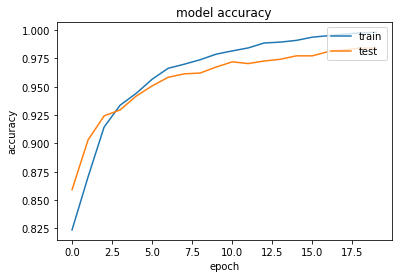

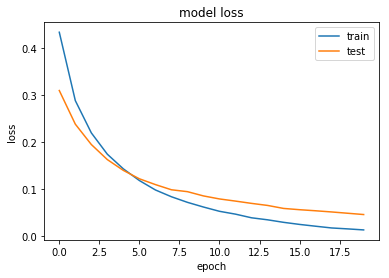

In [52]:

# summarize history for accuracy
plt.plot(ML.history['acc'])
plt.plot(ML.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(ML.history['loss'])
plt.plot(ML.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [53]:
model.save('model3.h5')

In [54]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(xtest)
y_pred=(y_pred>0.5)
cm=confusion_matrix(Ytest,y_pred)
cm

array([[1118,    9],
       [  12,  181]], dtype=int64)